In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

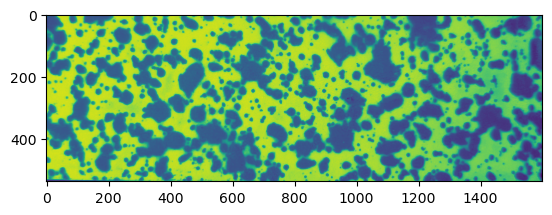

In [2]:
# using plt so image is shown in the notebook
img = cv2.imread('image_3.jpeg')
example_img = img[:, :, -1]
plt.imshow(example_img)

In [3]:
# image processing techniques to enhace image quality
from PIL import Image
from PIL import ImageFilter
from PIL import ImageEnhance

def smooth_image(img):
    return img.filter(ImageFilter.SMOOTH)

def enhance_image(img):
    return img.filter(ImageFilter.SHARPEN)

def adjust_brightness_contrast(img, brightness, contrast):
    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(brightness)
    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(contrast)
    return img

def adjust_saturation(img, saturation):
    enhancer = ImageEnhance.Color(img)
    img = enhancer.enhance(saturation)
    return img

def remove_noise(img):
    return cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

def enhance_edges(img):
    return cv2.Canny(img, 100, 200)

def equalize_histogram(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.equalizeHist(img_gray)


In [8]:
import cv2
import numpy as np
from PIL import Image

image = cv2.imread('image_3.jpeg')
cv2.imshow('Original Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


smoothed_image = smooth_image(Image.fromarray(image))
cv2.imshow('Smoothed Image', cv2.cvtColor(np.array(smoothed_image), cv2.COLOR_RGB2BGR))
cv2.waitKey(0)
cv2.destroyAllWindows()


pil_image = Image.fromarray(image)
adjusted_image = adjust_brightness_contrast(pil_image, 1.5, 1.2)
cv2.imshow('Adjusted Image', cv2.cvtColor(np.array(adjusted_image), cv2.COLOR_RGB2BGR))
cv2.waitKey(0)
cv2.destroyAllWindows()

# remove noise from the image
noise_removed_image = remove_noise(np.array(image))
cv2.imshow('Noise Removed Image', noise_removed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# enhance edges of the image
edges_enhanced_image = enhance_edges(image)
cv2.imshow('Image with Enhanced Edges', edges_enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# equalize histogram of the image
equalized_image = equalize_histogram(image)
cv2.imshow('Equalized Image', equalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [5]:
# splitting channels
b, g, r = cv2.split(img)

zeros = np.zeros_like(r)

# show only red channel as grayscale 
red_channel = cv2.merge([zeros, zeros, r])
cv2.imshow("Red Channel", red_channel)

green_channel = cv2.merge([zeros, g, zeros])
cv2.imshow("Green Channel", green_channel)

blue_channel = cv2.merge([b, zeros, zeros])
cv2.imshow("Blue Channel", blue_channel)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
# converting green_channel into grayscale
g_img = cv2.cvtColor(red_channel, cv2.COLOR_BGR2GRAY)
cv2.imshow('Grayscale Red Channel', g_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

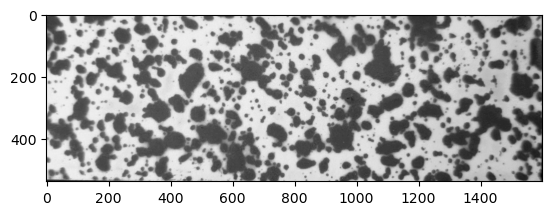

In [29]:
# reading and saving image as binary using plt
plt.imshow(g_img, cmap='gray')
plt.savefig('image_binary_plt.png')

In [30]:
# open new binary image with cv2
new_binary = cv2.imread('image_binary_plt.png')
cv2.imshow("Binary PLT Image", new_binary)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [65]:
# turning the grayscale image of the red channel into a binary image

threshold_value = 47  # adjust this value as needed
_, binary_mask = cv2.threshold(g_img, threshold_value, 255, cv2.THRESH_BINARY)

# invert the binary mask to highlight dark gray values
inverted_mask = cv2.bitwise_not(binary_mask)

cv2.imshow("Inverted Mask", inverted_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
# finding contours in the image
contours, _ = cv2.findContours(inverted_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Number of drips:", len(contours))

# copy of the original processed image in BGR to draw the detected contours
contour_image = cv2.cvtColor(inverted_mask, cv2.COLOR_GRAY2BGR)

# draw contours as red lines
cv2.drawContours(contour_image, contours, -1, (0, 0, 255), 2)  

cv2.imshow('Contour image', contour_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of drips: 343


In [7]:
# erode small drips from image
kernel = np.ones((2, 2), np.uint8)
erosion = cv2.erode(inverted_mask, kernel, iterations=1)
cv2.imshow("Erosion", erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

contours, _ = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Number of drips:", len(contours))

# copy of the original processed image in BGR to draw the detected contours
contour_image = cv2.cvtColor(erosion, cv2.COLOR_GRAY2BGR)

# draw contours as red lines
cv2.drawContours(contour_image, contours, -1, (0, 0, 255), 2)  

cv2.imshow('Contour image', contour_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of drips: 315


In [8]:
erosion2 = cv2.erode(erosion, kernel, iterations=1)
cv2.imshow("Erosion", erosion2)
cv2.waitKey(0)
cv2.destroyAllWindows()

contours2, _ = cv2.findContours(erosion2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Number of drips:", len(contours2))

# copy of the original processed image in BGR to draw the detected contours
contour_image2 = cv2.cvtColor(erosion2, cv2.COLOR_GRAY2BGR)

# draw contours as red lines
cv2.drawContours(contour_image2, contours2, -1, (0, 0, 255), 2)  

cv2.imshow('Contour image', contour_image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of drips: 284


In [9]:
erosion3 = cv2.erode(erosion2, kernel, iterations=1)
cv2.imshow("Erosion", erosion3)
cv2.waitKey(0)
cv2.destroyAllWindows()

contours3, _ = cv2.findContours(erosion3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Number of drips:", len(contours3))

# copy of the original processed image in BGR to draw the detected contours
contour_image3 = cv2.cvtColor(erosion3, cv2.COLOR_GRAY2BGR)

# draw contours as red lines
cv2.drawContours(contour_image3, contours3, -1, (0, 0, 255), 2)  

cv2.imshow('Contour image', contour_image3)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of drips: 278


In [10]:
erosion4 = cv2.erode(erosion3, kernel, iterations=1)
cv2.imshow("Erosion", erosion4)
cv2.waitKey(0)
cv2.destroyAllWindows()

contours4, _ = cv2.findContours(erosion4, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Number of drips:", len(contours4))

# copy of the original processed image in BGR to draw the detected contours
contour_image4 = cv2.cvtColor(erosion4, cv2.COLOR_GRAY2BGR)

# draw contours as red lines
cv2.drawContours(contour_image4, contours4, -1, (0, 0, 255), 2)  

cv2.imshow('Contour image', contour_image4)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of drips: 273


In [11]:
erosion5 = cv2.erode(erosion4, kernel, iterations=1)
cv2.imshow("Erosion", erosion5)
cv2.waitKey(0)
cv2.destroyAllWindows()

contours5, _ = cv2.findContours(erosion5, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Number of drips:", len(contours5))

# copy of the original processed image in BGR to draw the detected contours
contour_image5 = cv2.cvtColor(erosion5, cv2.COLOR_GRAY2BGR)

# draw contours as red lines
cv2.drawContours(contour_image5, contours5, -1, (0, 0, 255), 2)  

cv2.imshow('Contour image', contour_image5)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of drips: 257


In [12]:
# ERODE SMALL DRIPS AND COUNT 
# THEN ERODE THE BIG DRIPS AND COUNT
# USE A FOR from now on (after erosion5)